# Tarea 2: Red Neuronal Perceptrón Multicapa con TensorFlow V2

## Cargamos las librerias

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
tf.__version__


'2.6.0'

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()


## Extraemos los datos

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist


## Union de Datos

El dataset Fashion_Mnist cuenta con 60,000 imagenes de entrenamiento y 10,000 imagenes de prueba; Para los fines de esta tarea, se hara una división del dataset con una relación 30-70, es decir, %30 del dataset será destinado a test y %70 a entrenamiento.

In [4]:
X = np.concatenate((x_train, x_test))
Y = np.concatenate((y_train, y_test))


In [5]:
X = X.reshape(len(X), 28*28).astype('float32')


## Codificación One Hot Encoding 

Las clases se representan con etiquetas numericas en el rango de $0,\cdots,9$:

<div align="center">

| Identificador 	| Clase 	|
|---	|---	|
| 0 	| T-shirt/top 	|
| 1 	| Trouser 	|
| 2 	| Pullover 	|
| 3 	| Dress 	|
| 4 	| Coat 	|
| 5 	| Sandal 	|
| 6 	| Shirt 	|
| 7 	| Sneaker 	|
| 8 	| Bag 	|
| 9 	| Ankle Boot 	|

</div>

Debido al identificador puede (o no) realizarse una codificación del tipo One Hot. Esta codificación permite que el modelo neuronal interprete la distancia entre identificadores de la misma forma, es decir, en un mal aprendizaje puede asociar la clase "Trouser" con la clase "Pullover" por que los identificadores son cercanos entre si, de forma comtraria es posible que interprete una relación (erronea) entre los identificadores mas separadas, lo cual no es relevante.

A fin de observar el efecto de la codificación se realizaran dos modelos: uno con codificación ONE HOT y otro sin ella.


In [6]:
ONE_HOT_ENC = OneHotEncoder(sparse=False)
Y_OHE = Y.reshape(len(Y), 1)
Y_OHE = ONE_HOT_ENC.fit_transform(Y_OHE)


In [7]:
print("Las dimensiones del vector de etiquetas son {}".format(Y.shape))
print("Los primeros 10 elementos son: \n {}".format(Y[0:10]))


Las dimensiones del vector de etiquetas son (70000,)
Los primeros 10 elementos son: 
 [9 0 0 3 0 2 7 2 5 5]


In [8]:
print("Los primeros 10 elementos codificados son: \n {}".format(Y_OHE[0:10]))


Los primeros 10 elementos codificados son: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Arquitectura de el modelo

Se aprovecha el paradigma de la programación orientada a objetos de Python para desarrollar una instancia que permita la declaración de la arquitectura del modelo MLP.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y_OHE, train_size=0.75, random_state=1998)

print("Tamaño del set de entrenamiento: {} elementos".format(len(x_train)))
print("Tamaño del set de prueba: {} elementos".format(len(x_test)))


Tamaño del set de entrenamiento: 52500 elementos
Tamaño del set de prueba: 17500 elementos


In [10]:
MLP_1 = tf.keras.Sequential()

MLP_1.add(Dense(784, activation='relu', input_shape=(784,)))
MLP_1.add(Dense(512, activation='relu'))
MLP_1.add(Dense(256, activation='relu'))
MLP_1.add(Dense(128, activation='relu'))
MLP_1.add(Dense(10))

MLP_1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,182,874
Trainable params: 1,182,874
Non-trainable params: 0
_________________________________________________________________


In [11]:
MLP_1.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

HIST = MLP_1.fit(x_train, y_train,
                 batch_size=160,
                 epochs=35,
                 verbose=1,
                 validation_data=(x_test, y_test))


Epoch 1/35
329/329 [==============================] - 2s 4ms/step - loss: 59.0005 - accuracy: 0.1587 - val_loss: 2.2044 - val_accuracy: 0.1925
Epoch 2/35
329/329 [==============================] - 1s 4ms/step - loss: 1.3209 - accuracy: 0.2336 - val_loss: 1.8603 - val_accuracy: 0.2036
Epoch 3/35
329/329 [==============================] - 1s 4ms/step - loss: 0.7872 - accuracy: 0.2972 - val_loss: 0.7302 - val_accuracy: 0.2818
Epoch 4/35
329/329 [==============================] - 1s 4ms/step - loss: 0.5336 - accuracy: 0.3589 - val_loss: 0.5486 - val_accuracy: 0.2873
Epoch 5/35
329/329 [==============================] - 1s 4ms/step - loss: 0.4259 - accuracy: 0.4117 - val_loss: 0.4546 - val_accuracy: 0.3780
Epoch 6/35
329/329 [==============================] - 1s 4ms/step - loss: 0.3007 - accuracy: 0.4707 - val_loss: 0.3831 - val_accuracy: 0.3959
Epoch 7/35
329/329 [==============================] - 1s 4ms/step - loss: 0.2369 - accuracy: 0.5234 - val_loss: 0.2058 - val_accuracy: 0.5629
Epoch

In [12]:
print(HIST.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


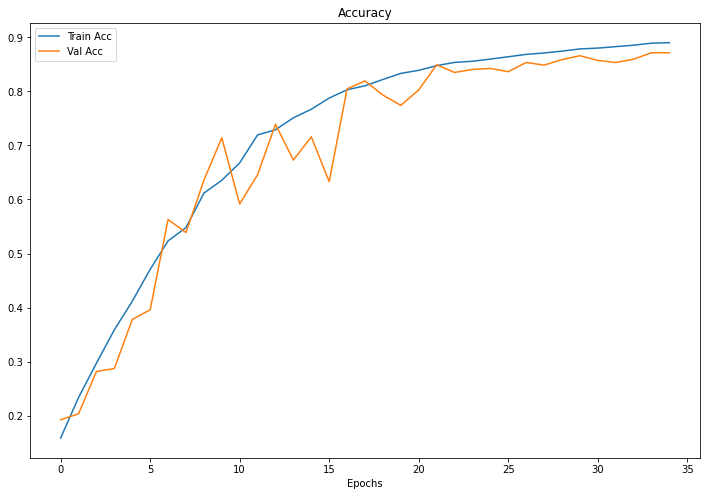

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(HIST.history['accuracy'])
plt.plot(HIST.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train Acc", "Val Acc"])
plt.show()


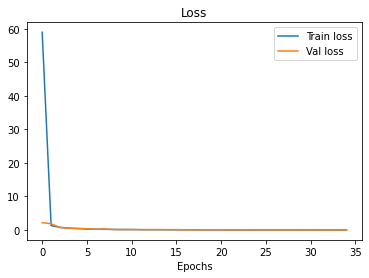

In [14]:
plt.plot(HIST.history['loss'])
plt.plot(HIST.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend(["Train loss", "Val loss"])
plt.show()

In [15]:
MLP_1.save("models_keras/MAGZ_V4.h5")